## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data = pd.read_csv("website.csv")
data.head()

,Date,Clicks,Impressions,CTR,Position
0,2023-12-31,190,8739,2.17%,15.82
1,2023-12-30,274,38880,0.7%,41.63
2,2023-12-29,291,37782,0.77%,39.42
3,2023-12-28,326,41323,0.79%,38.95
4,2023-12-27,362,43699,0.83%,38.92


In [4]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%Y/%m/%d")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Clicks       365 non-null    int64         
 2   Impressions  365 non-null    int64         
 3   CTR          365 non-null    object        
 4   Position     365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 14.4+ KB


In [17]:
#data = data.drop(index=0)

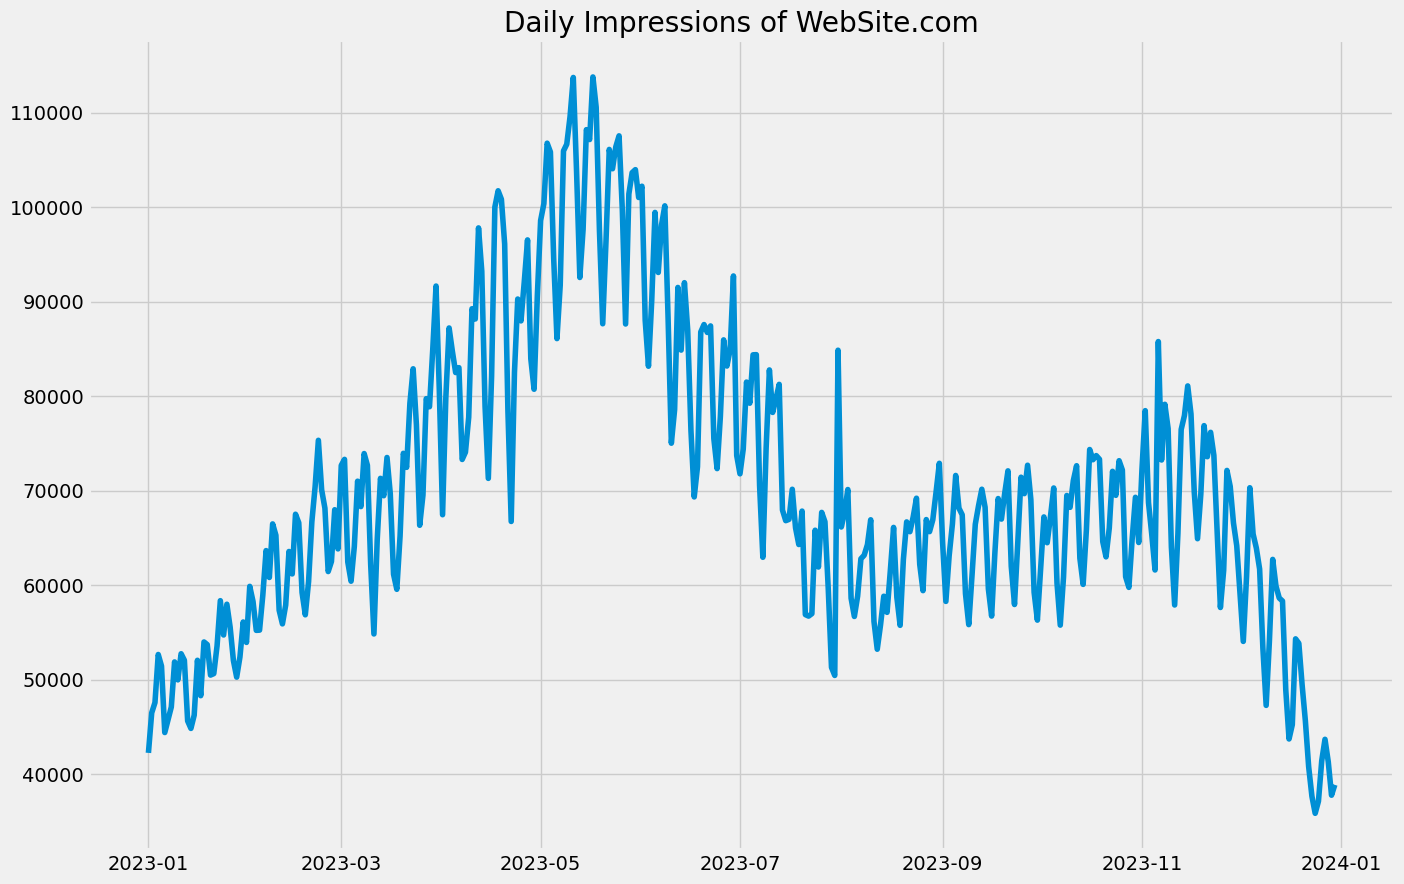

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Impressions"])
plt.title("Daily Impressions of WebSite.com")
plt.show()

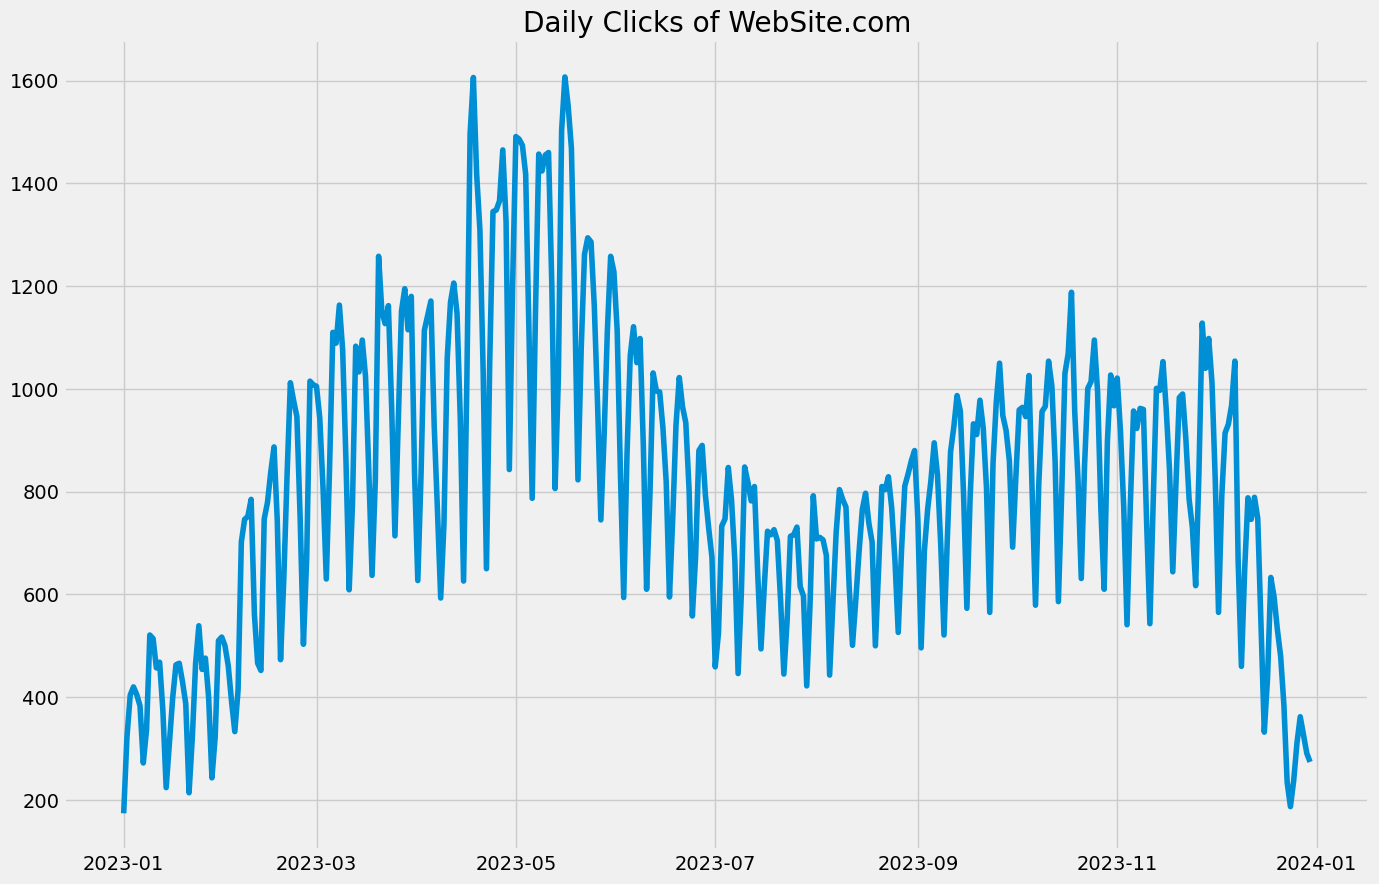

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Clicks"])
plt.title("Daily Clicks of WebSite.com")
plt.show()

In [21]:
data.head()

,Date,Clicks,Impressions,CTR,Position
1,2023-12-30,274,38880,0.7%,41.63
2,2023-12-29,291,37782,0.77%,39.42
3,2023-12-28,326,41323,0.79%,38.95
4,2023-12-27,362,43699,0.83%,38.92
5,2023-12-26,311,41421,0.75%,40.25


In [22]:
data.describe()

,Clicks,Impressions,Position
count,364.000000,364.000000,364.000000
mean,815.282967,70342.107143,36.582857
std,286.579110,15872.813670,2.976763
min,174.000000,35867.000000,29.900000
25%,613.750000,59608.500000,34.597500
50%,806.500000,67697.500000,36.455000
75%,998.000000,78978.500000,38.895000
max,1607.000000,113783.000000,44.270000


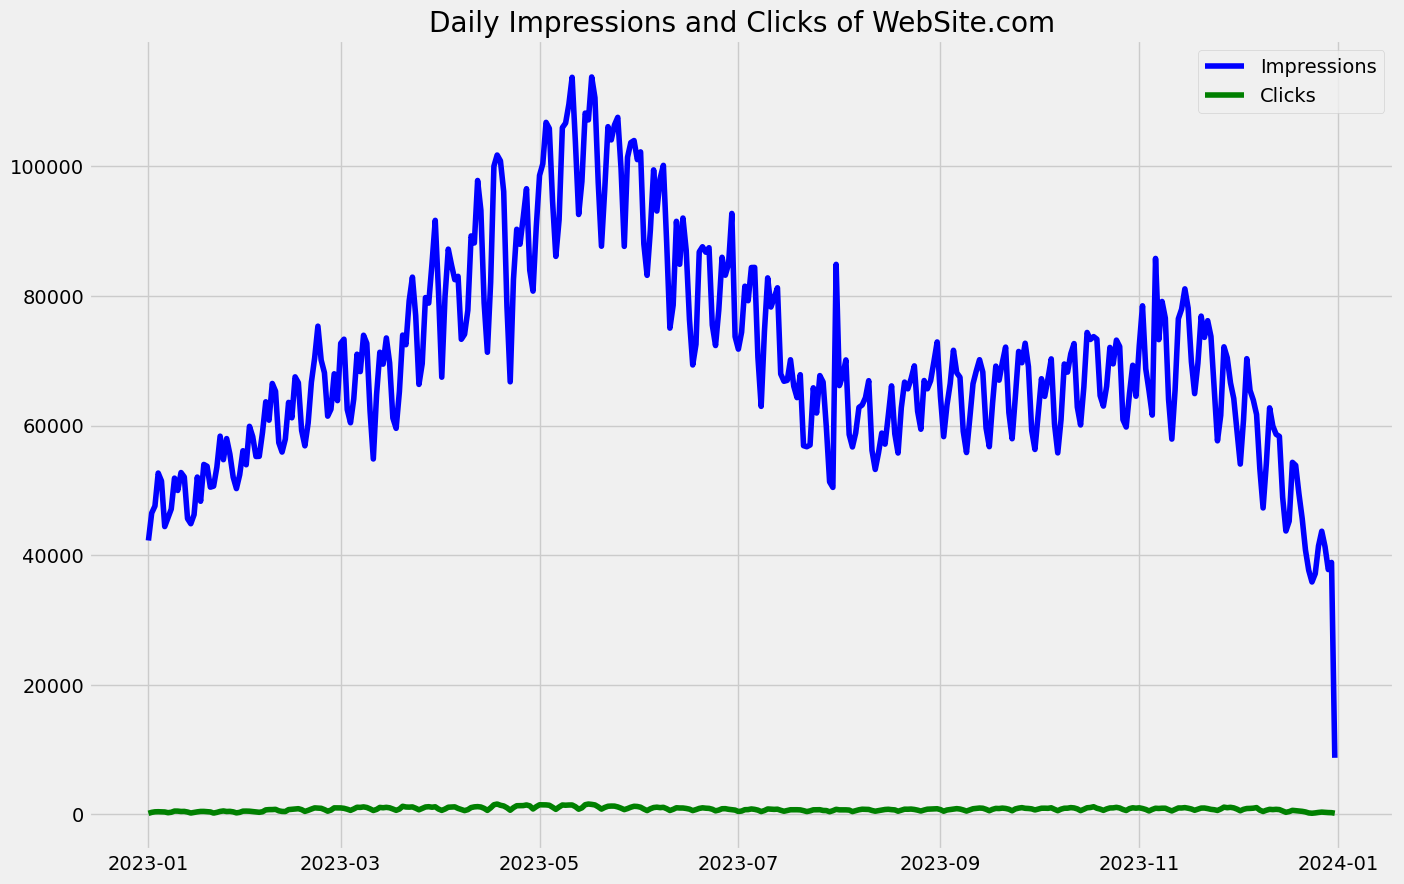

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))

# Plotting Impressions with blue color
plt.plot(data["Date"], data["Impressions"], color='blue', label='Impressions')

# Plotting Clicks with green color
plt.plot(data["Date"], data["Clicks"], color='green', label='Clicks')

plt.title("Daily Impressions and Clicks of WebSite.com")
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

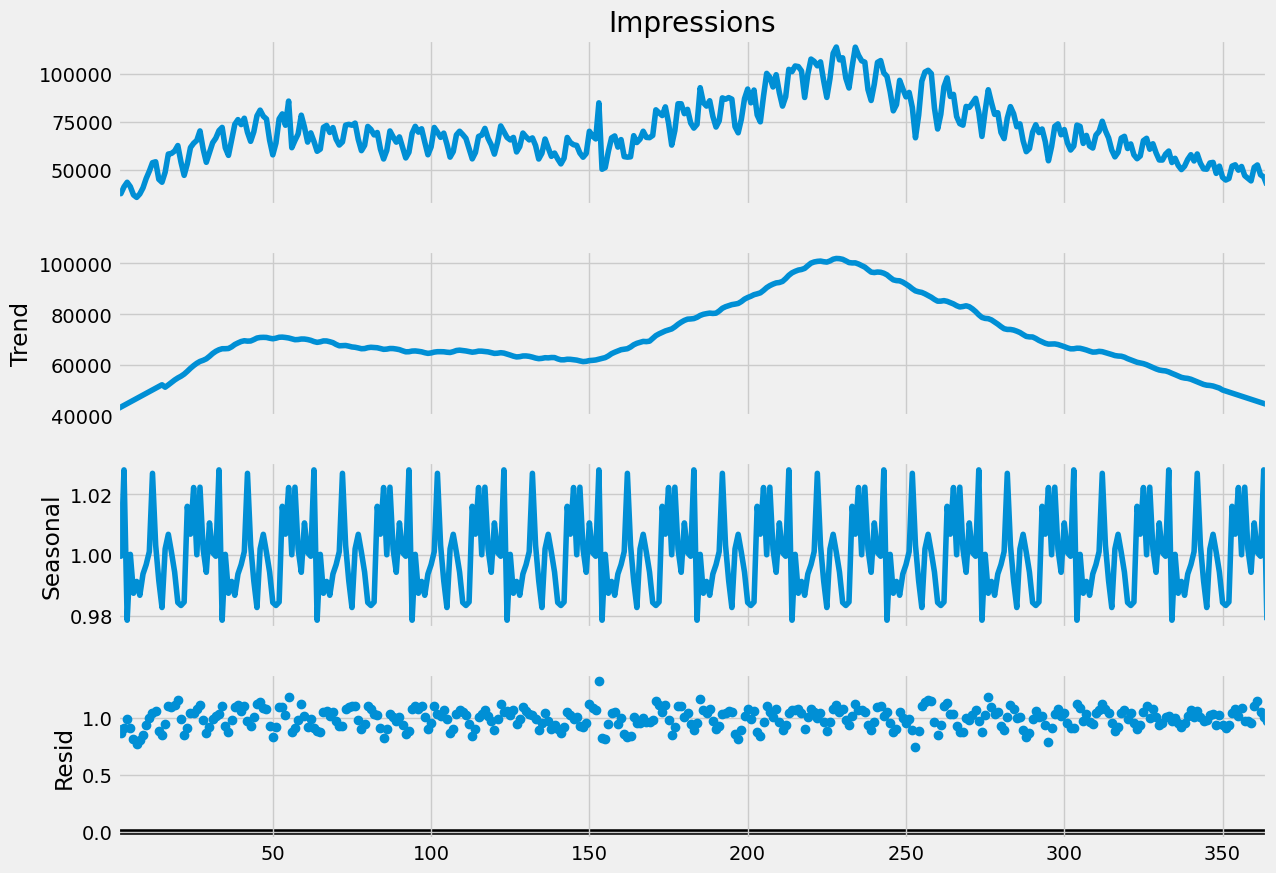

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Impressions"], model='multiplicative',extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

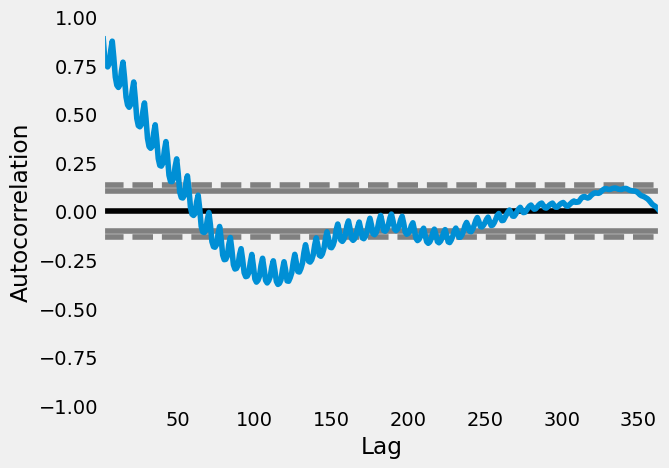

In [24]:
pd.plotting.autocorrelation_plot(data["Impressions"])

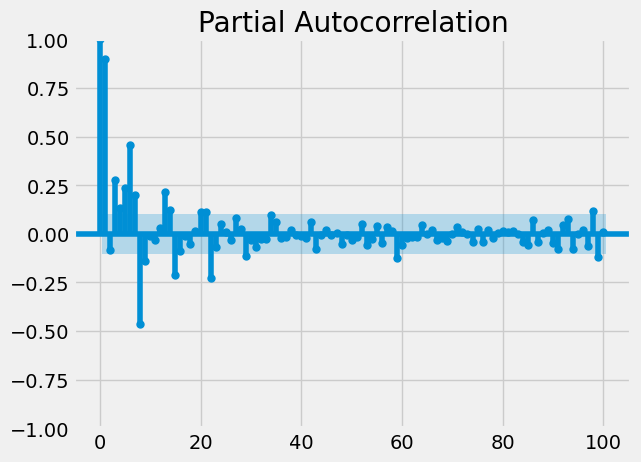

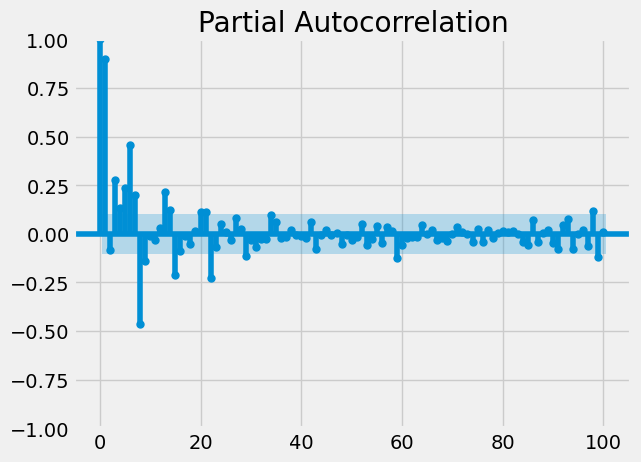

In [25]:
plot_pacf(data["Impressions"], lags = 100)

In [30]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Impressions'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\huawei\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\huawei\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\huawei\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        Impressions   No. Observations:                  364
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3513.288
Date:                            Tue, 02 Jan 2024   AIC                           7056.576
Time:                                    14:29:19   BIC                           7114.488
Sample:                                         0   HQIC                          7079.624
                                            - 364                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1054      0.107      0.984      0.325      -0.105       0.315
ar.L2         -0.7186      0.082   

In [31]:
predictions=model.predict(len(data),len(data)+50)
print(predictions)

365    40397.566140
366    44420.614534
367    47009.861141
368    46642.291623
369    43975.540706
370    42433.769321
371    39124.635259
372    36401.170667
373    40435.980009
374    41909.981267
375    42319.024920
376    41014.100041
377    40107.585422
378    40415.701501
379    36789.695134
380    38442.555021
381    40596.497840
382    39256.467898
383    37581.866985
384    35664.558656
385    37635.710054
386    33715.294336
387    34219.320058
388    35931.213967
389    36554.160240
390    36712.003533
391    35364.363174
392    35465.263936
393    32190.926450
394    32324.473308
395    32590.684028
396    33263.770757
397    33642.887511
398    30259.045220
399    30270.488870
400    28117.640050
401    29182.617977
402    33226.280343
403    31558.418881
404    30744.299863
405    28701.198611
406    28397.679664
407    25614.985859
408    25228.054184
409    29825.236568
410    27693.717169
411    26362.430566
412    25146.888987
413    25244.329370
414    25456.809811


<Axes: >

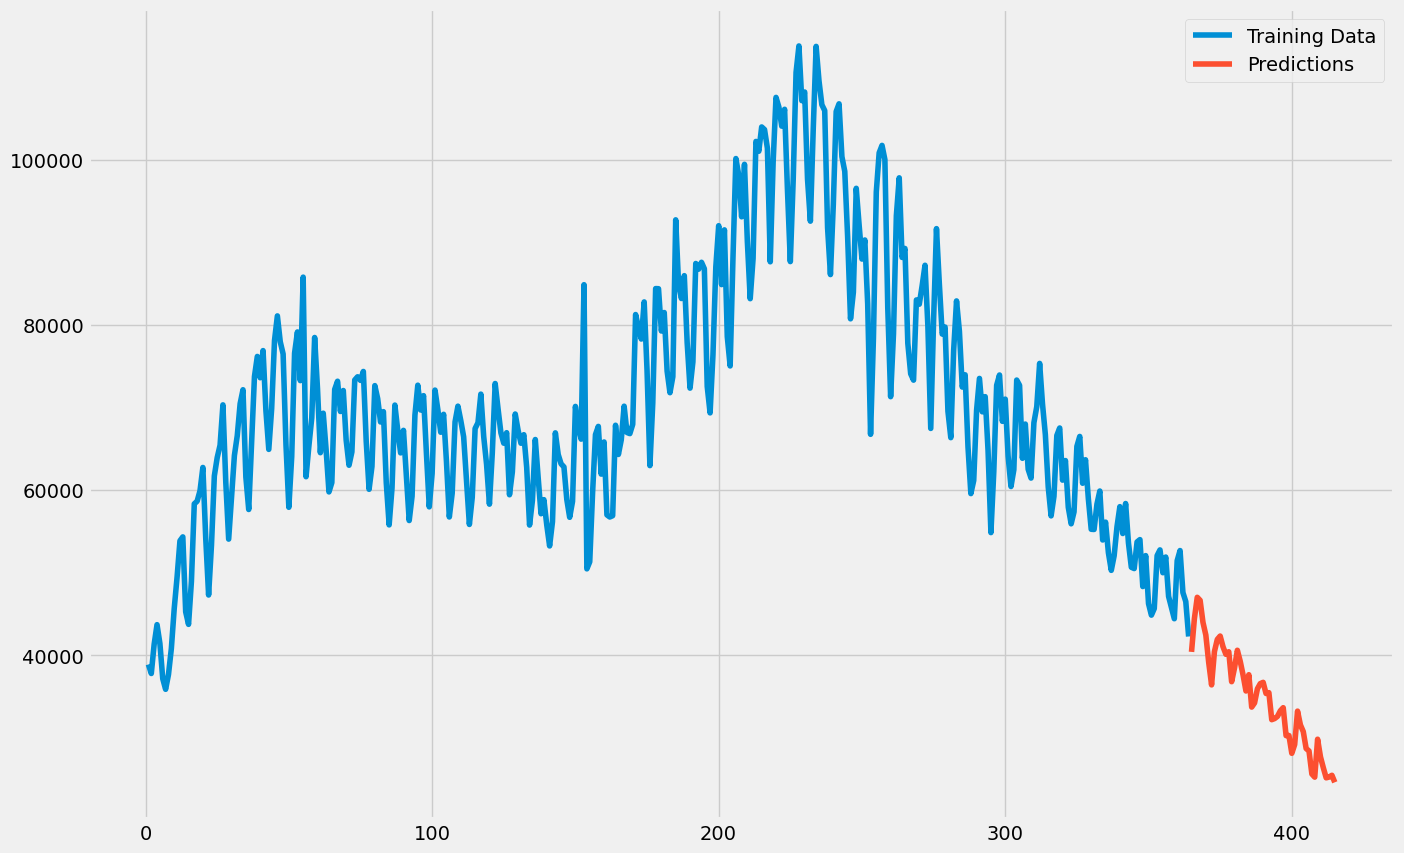

In [32]:
data["Impressions"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [34]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [35]:
# Extract the day number as a feature
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

In [45]:
# Define features (X) and target variable (y)
X = data[['Day']]
y = data['Impressions']

In [57]:
data

,Date,Clicks,Impressions,CTR,Position,Day
1,2023-12-30,274,38880,0.7%,41.63,363
2,2023-12-29,291,37782,0.77%,39.42,362
3,2023-12-28,326,41323,0.79%,38.95,361
4,2023-12-27,362,43699,0.83%,38.92,360
5,2023-12-26,311,41421,0.75%,40.25,359
...,...,...,...,...,...,...
360,2023-01-05,405,51447,0.79%,40.02,4
361,2023-01-04,420,52673,0.8%,39.63,3
362,2023-01-03,404,47586,0.85%,39.84,2
363,2023-01-02,322,46495,0.69%,41.04,1


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error: 313576447.39272445
Mean Absolute Error: 13550.021557514523
R2 Score: 0.015092488931535586


In [54]:
# Forecasting for the next day
last_date = data['Date'].max()
next_day = last_date + pd.DateOffset(1)
next_day_number = (next_day - data['Date'].min()).days
next_day_pred = model.predict([[next_day_number]])

C:\Users\huawei\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecast for the next day: 66074 Impressions


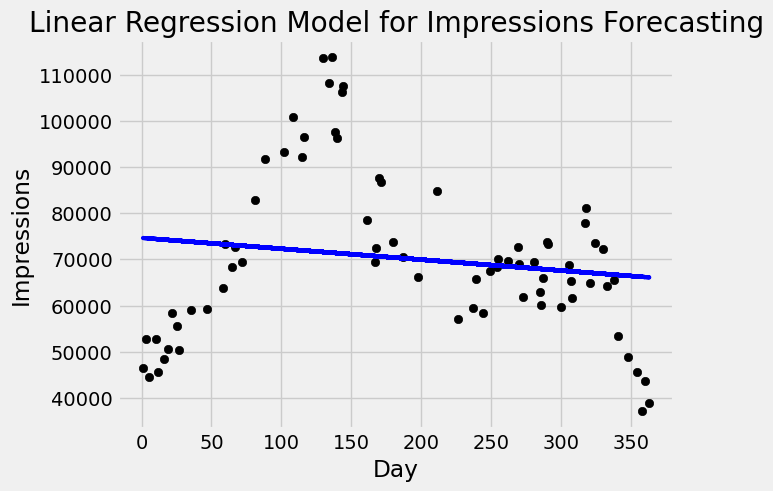

In [55]:
print(f'Forecast for the next day: {int(next_day_pred)} Impressions')  # Change to Impressions if needed

# Visualize the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model for Impressions Forecasting')
plt.xlabel('Day')
plt.ylabel('Impressions')
plt.show()